## Adapted from 7.2: Hydrodynamic waves and instabilities of a gravitating slab

Gravity is in the $x$ direction, and we consider normal mode solutions of the form $\vec \xi(\vec r, t) = \hat{\vec \xi} e^{i(k_y y - \omega t)}$ (where the $z$ direction is eliminated via symmetry). We consider an exponentially stratified medium with:

$$ \rho = \rho_0 e^{-\alpha x}, p = p_0 e^{-\alpha x} \text{ and } c^2 = \frac{\gamma p}{\rho} = \frac{\gamma p_0}{\rho_0} \text{ is constant}.$$

The $y$ component can be eliminated through substitution, so the differential equation in the $x$ direction only becomes (7.39):
$$ \partial^2_x \hat \xi_x - \alpha \partial_x \hat \xi_x + \frac{\omega^2 - k_0^2 c^2 \omega^2 + k_0^2 c^2 N_B^2}{c^2 \omega^2} \hat \xi_x = 0.$$

Solutions take the form: $\hat \xi_x = C \exp[ (\frac{1}{2} \alpha \pm i q) x]$ where:

$$q = \sqrt{ - \frac{1}{4} \alpha^2 + \omega^2 / c^2 - k_0^2 + k_0^2 N_B^2 / \omega^2}$$
with the Brunt-Vausalaa frequency $N_B^2 = \alpha g - g^2 / c^2$. We obtain the dispersion relation:
$$ \omega^4 - (k_0^2 + q^2 + \frac{1}{4} \alpha^2) c^2 \omega^2 + k_0^2 c^2 N_B^2 = 0.$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt

We reproduce figure 7.3. This uses the normalized values:

$$ \bar q = a q,\hspace{3mm}  \bar k_0 = a k_0,\hspace{3mm}  \bar k_\text{eff} = a k_\text{eff},\hspace{3mm} \bar\alpha = a\alpha $$
$$ \bar\omega = \frac{a}{c} \omega \hspace{3mm} \bar N_B = \frac{a}{c} N_B $$

Then the solution becomes:
$$ \omega^2 = \frac{1}{2} k_\text{eff}^2 c^2 \left[ 1 \pm \sqrt{1 - 4\frac{k_0^2 N_B^2}{k_\text{eff}^4 c^2}}\right]$$

$$ \frac{c^2}{a^2}  \bar\omega^2 = \frac{1}{2} \bar k_\text{eff}^2 \frac{c^2}{a^2} \left[ 1 \pm \sqrt{1 - 4\frac{(\bar k_0^2 / a^2) (\bar N_B^2 / \frac{a^2}{c^2})}{(\bar k_\text{eff}^4/a^4) c^2}}\right]$$

$$ \bar\omega^2 = \frac{1}{2} \bar k_\text{eff}^2 \left[ 1 \pm \sqrt{1 - 4\frac{\bar k_0^2  \bar N_B^2 }{\bar k_\text{eff}^4 }}\right]$$

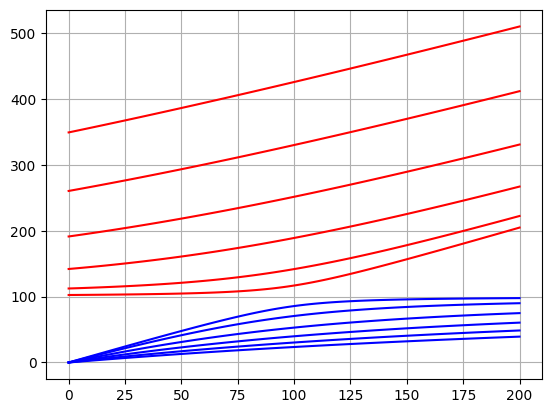

In [ ]:

def plot_energy_levels():
    Nb_bar = 10
    alpha_bar = 10.12 * 2

    k02_bars = np.linspace(0,200,100)
    ns = np.array(range(0,6))
    signs = [-1,1]

    for n in ns:
        q_bar = np.pi * n
        for sign in signs:
            out = []
            for k02_bar in k02_bars:
                keff2_bar = k02_bar + q_bar**2 + 0.25*alpha_bar**2
                omega2 = 0.5 * keff2_bar * ( 1 + sign * np.sqrt(  1 - 4*k02_bar * Nb_bar**2 / ( keff2_bar**2 ) ))

                out.append(omega2)

            plt.plot(k02_bars, out,c="r" if sign == 1 else "b")

    plt.grid()
    plt.show()
    
     
plot_energy_levels()

The differential equation in the normalized quantities takes the form:

$$ \partial^2_x \hat \xi_x -  \frac{\bar \alpha}{a} \partial_x \hat \xi_x + \frac{ \frac{c^4}{a^4} \bar \omega^4 - \frac{c^2}{a^2} \frac{\bar k_0^2}{a^2} c^2 \bar\omega^2 + \frac{ \bar k_0^2}{a^2} c^2 \frac{c^2}{a^2} \bar N_B^2}{c^2 \frac{c^2}{a^2} \bar \omega^2} \hat \xi_x = 0.$$




$$ a^2 \partial^2_x \hat \xi_x -   a \bar \alpha \partial_x \hat \xi_x +  \frac{  \bar \omega^4 - \bar k_0^2 \bar\omega^2 + \bar k_0^2 \bar N_B^2}{ \bar \omega^2} \hat \xi_x = 0.$$

With $\partial_{\bar x} = a\partial_{x}$ we obtain:
$$  \partial^2_{\bar x} \hat \xi_x -  \bar \alpha \partial_{\bar x} \hat \xi_x +  \frac{  \bar \omega^4 - \bar k_0^2 \bar\omega^2 + \bar k_0^2 \bar N_B^2}{ \bar \omega^2} \hat \xi_x = 0.$$


## Particle in a box basis

We consider a basis for $n \in \mathbb{Z}^+$:
$$\braket{x|s,n} =  \sqrt{\frac{2}{a}}\sin( \frac{n\pi}{a} x ), \hspace{3mm} \braket{x|c,n} =  \sqrt{\frac{2}{a}}\cos( \frac{n\pi}{a} x ) $$

The sin versions $\ket{s,n}$ satisfy the boundary conditions $\braket{0 | s,n} = \braket{a | s,n} = 0$ while the cos versions do not. But we include the cos versions anyway since the sine versions alone are not enough to support the $\partial_x$ operator.

$$\partial_{x}\ket{s,n} = \frac{n\pi}{a} \ket{c,n}, \hspace{3mm} \partial_{x}\ket{c,n} = -\frac{n\pi}{a} \ket{s,n}$$

$$\partial^2_{x}\ket{s,n} = -\frac{n^2\pi^2}{a^2} \ket{s,n}, \hspace{3mm} \partial_{x}^2\ket{c,n} = -\frac{n^2\pi^2}{a^2} \ket{c,n}$$

In [ ]:
def idx_s(n):
    return 2*n

def idx_c(n):
    return 2*n+1

def partial_x_bar_1(N):
    out = np.zeros((2*N,2*N))
    for n in range(N):
        out[idx_c(n),idx_s(n)] = n*np.pi
        out[idx_s(n),idx_c(n)] = -n*np.pi
    return out

## A different particle in a box basis

We fix $a = 1$ and use $\braket{x | n} = e^{i n x}$. Here we take $n \in \{-N, -1,0,1, ... N\}$. Observe that $\partial_x \ket{n} = in \ket{n}$ is diagonal. However none of the basis functions satisfy the boundary condition $\phi_n(0) = \phi_n(1) = 0$ where $\phi_n(x) = \braket{x|n}$ - you need to take linear combinations if you want functions that do that.



In [82]:
def idx_pb(n, N):
    assert -N <= n <= N
    return N - n

def partial_x_bar_2(N):
    out = np.zeros((2*N+1,2*N+1),dtype=complex)
    for n in range(-N, N+1):
        out[idx_pb(n,N), idx_pb(n,N)] = 1j * n
    return out

## Spectrum of the forcing operator

Setting $k_z = 0$, the forcing equation becomes:

$$\begin{bmatrix}  \partial_x \gamma p \partial_x & i k_y (\partial_x \gamma p + \rho g) \\ i k_y (\gamma p \partial_x - \rho g) & - k^2_y \gamma p\end{bmatrix} \begin{bmatrix}\hat\xi_x \\ \hat \xi_y\end{bmatrix} = -\omega^2 e^{-\alpha x} \begin{bmatrix}\hat\xi_x \\ \hat \xi_y\end{bmatrix}$$

With the exponentially stratified medium we have $\rho = \rho_0 e^{-\alpha x}$ and $p = p_0 e^{-\alpha x}$. This simplifies the equation:
$$\begin{bmatrix} -\alpha \gamma p_0 \partial_x  + \gamma p_0 \partial_x^2 & i k_y ( \gamma p_0 \partial_x + \rho_0 g) \\ i k_y (\gamma p_0 \partial_x - \rho_0 g) & - k^2_y \gamma p_0 \end{bmatrix} \begin{bmatrix}\hat\xi_x \\ \hat \xi_y\end{bmatrix} = -\omega^2  \begin{bmatrix}\hat\xi_x \\ \hat \xi_y\end{bmatrix}$$




$$ \frac{1}{a}\partial_{\bar x} = \partial_{x}$$

$$ \bar q = a q,\hspace{3mm}  \bar k_0 = a k_0,\hspace{3mm}  \bar k_\text{eff} = a k_\text{eff},\hspace{3mm} \bar\alpha = a\alpha $$
$$ \bar\omega = \frac{a}{c} \omega \hspace{3mm} \bar N_B = \frac{a}{c} N_B $$

$$ \alpha = \frac{\rho_0 g}{p_0} = \frac{\gamma g}{c^2} $$

$$c^2 = \frac{p_0 \gamma }{\rho_0 }$$

Finally we convert to the normalized values:

$$ \rho_0 \begin{bmatrix} - \bar \alpha \partial_{\bar x}  +  \partial_{\bar x}^2 & i \bar k_y (  \partial_{\bar x} + \frac{\bar \alpha}{\gamma}) \\ i \bar k_y ( \partial_{\bar x} - \frac{\bar \alpha}{\gamma}) & - \bar k^2_y  \end{bmatrix} \begin{bmatrix}\hat\xi_x \\ \hat \xi_y\end{bmatrix} = -\bar \omega^2  \begin{bmatrix}\hat\xi_x \\ \hat \xi_y\end{bmatrix}$$

Something is wrong with the units. Lets pretend that $\rho_0$ isn't actually there and proceed.

$$ \bar N^2_B = \frac{a^2}{c^2}  (\gamma - 1) \frac{g^2}{c^2} = \frac{a^2 g^2 \gamma^2}{c^4} \frac{\gamma - 1}{\gamma} = \bar \alpha^2 \frac{\gamma - 1}{\gamma}$$


$$ \frac{\bar \alpha}{\gamma} =  \bar \alpha - \frac{\bar N^2_B }{\bar \alpha} $$

In [94]:
def get_energy_levels(N, ky_bar, trunc=False):
    dx = partial_x_bar_2(N)
    dx2 = dx @ dx

    Nb_bar = 10
    alpha_bar = 10.12 * 2
    alpha_bar_over_gamma = alpha_bar - Nb_bar**2 / alpha_bar

    top_left = - alpha_bar * dx + dx2
    top_right = 1j* ky_bar * (dx + alpha_bar_over_gamma)
    bottom_left = 1j* ky_bar * (dx - alpha_bar_over_gamma)
    bottom_right = - ky_bar**2 * np.eye(dx.shape[0])

    F = np.block([[top_left, top_right],
                  [bottom_left, bottom_right]])
    
    omegas_squared = np.linalg.eigvals(-F)
    # problem: these are complex. Looks like F is not hermitian.

    out = np.real(omegas_squared)

    # there seems to be a top and bottom outlier. truncate these
    if trunc:
        top = max(out)
        bot = min(out)
        out = [ omega2 for omega2 in out if omega2 != top and omega2 != bot ]

    return out


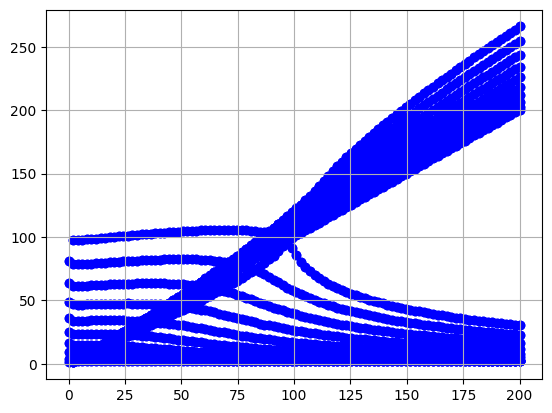

In [93]:
def plot_energy_levels():
    Nb_bar = 10
    alpha_bar = 10.12 * 2

    ky2_bars = np.linspace(0,200,100)
    signs = [-1,1]

    for ky2_bar in ky2_bars:
        omega_bar2s = get_energy_levels(10, np.sqrt(ky2_bar), trunc=True)

        plt.scatter(len(omega_bar2s)*[ky2_bar], omega_bar2s,c="b")

    plt.grid()
    plt.show()
    
plot_energy_levels()

## Preparing position operators

We avoided preparing a block encoding of the 'pressure' operator $ \hat p \ket{x} = p_0 e^{-\alpha x}\ket{x}$ this time, but in the future we need to find a way to block-encode operators like this in the particle-in-a-box basis.

To do this, we discussed:

   - Approximating the continuous Fourier transform with the discrete one. Apparently Seth Lloyd thinks this doesn't work.

   - We can use eigenvalue transformation on $\hat x \ket{x} = x \ket{x}$ using a polynomial approximation to $p_0 e^{-\alpha x}$. The matrix elements of $\hat x$ in the particle-in-a-box basis are:

   $$\bra{k} \hat x \ket{l} = \frac{e^{-i(k-l)} ( 1- i (k-l) )- 1}{(k-l)^2}$$

   This matrix is dense, but since it concentrates around the diagonal maybe a sparse approximation is attainable through truncation. How well does this scale?